# Heart Disease Prediction 

### In this project we want to predict if a human may suffer a heart disease in ten years based on thousand of pacients and several attributes
1) Import Packages

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


### 2) Load de data and study the quality

Columns:  4238 
 Rows:  16


Column names: ['male' 'age' 'education' 'currentSmoker' 'cigsPerDay' 'BPMeds'
 'prevalentStroke' 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP'
 'BMI' 'heartRate' 'glucose' 'TenYearCHD']


male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose

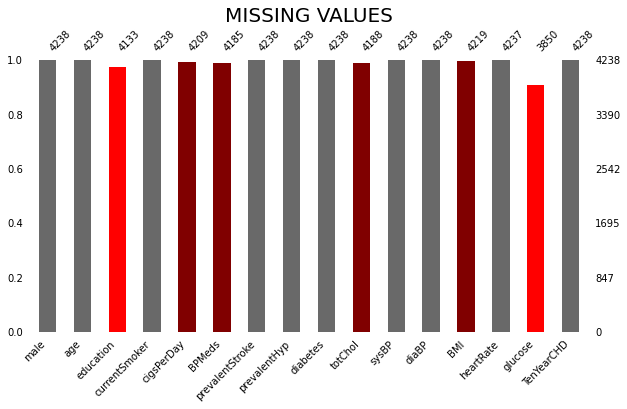

In [6]:
data = pd.read_csv('heart.csv')

print('Columns: ',data.shape[0],'\n','Rows: ',data.shape[1])
print('\n')
print('Column names:', data.columns.values)
print('\n')
print(data.dtypes)



print('\n')

#plot the missing data to visualize more easily 
print(data.isna().sum())
color= ['dimgrey','dimgrey','red','dimgrey','maroon','maroon','dimgrey','dimgrey','dimgrey','maroon','dimgrey','dimgrey','maroon','dimgrey','red','dimgrey']
msno.bar(data,fontsize=10,color=color,figsize=(10,5))
plt.title('MISSING VALUES',fontsize=20)
plt.show()

As we can see this dataset has 4238 rows and 16 columns. All the columns types are correct because we're only working with numbers in all of them.

The education, cigs per day, BPMeds, totChol, BMI, heartRate and glucose columns have missing values. In the next step we're going to fix this problem by removing the education because isn't relevant and replacing the NaN's with the mean of each column 



In [7]:
#Drop education
data.drop(columns=['education'],inplace=True)

#fill NaN's 
data.fillna(data.mean(),inplace=True) 

print(data.isna().sum())

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


Now we dont have any missing values so lets found outliers and research some basic statistic

In [11]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Lets visualize this data


Text(0.5, 0, 'Total Cholesterol')

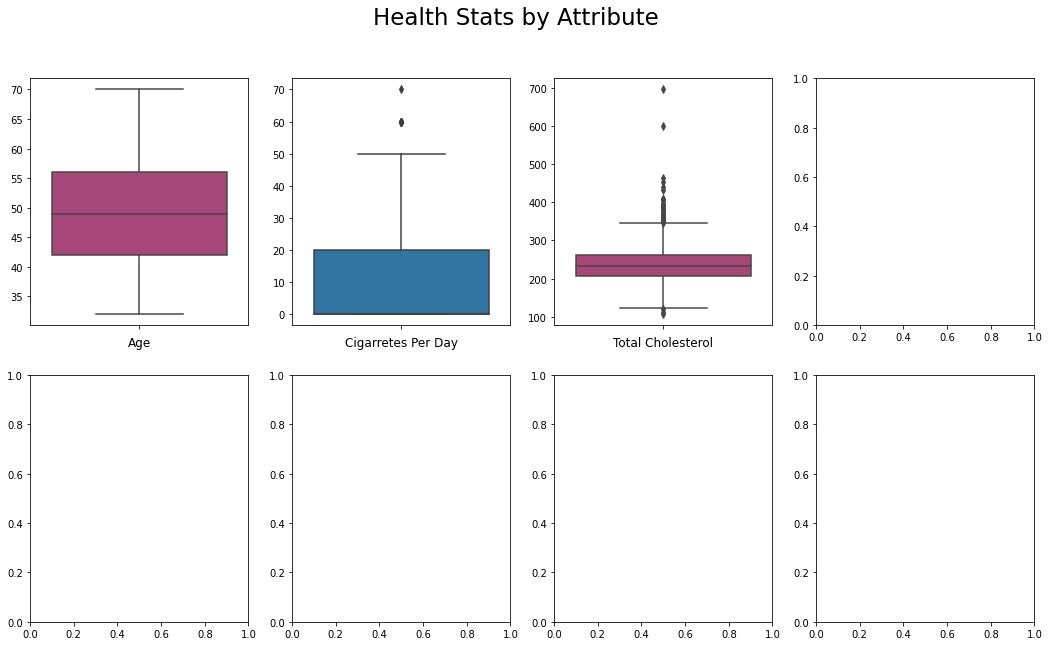

In [63]:
columns=list(data.columns.values)

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Health Stats by Attribute',fontsize=23)

sns.boxplot(ax=axes[0, 0], data=data ,y='age',palette='magma')
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('Age',fontsize=12)

sns.boxplot(ax=axes[0, 1], data=data ,y='cigsPerDay')
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('Cigarretes Per Day',fontsize=12)

sns.boxplot(ax=axes[0, 2], data=data ,y='totChol',palette='magma')
axes[0,2].set_ylabel('')
axes[0,2].set_xlabel('Total Cholesterol',fontsize=12)

